In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

from sklearn.model_selection import train_test_split
from bart_playground import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

X = X.values.astype(float)
y = np.array(y).reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [3]:
proposal_probs = {"multi_grow": 0.5, "multi_prune": 0.5}
bart_mtmh = MultiBART(ndpost=1000, nskip=0, n_trees=100, proposal_probs=proposal_probs, multi_tries=10)
bart_mtmh.fit(X_train, y_train)
sigmas_mtmh = [trace.global_params['eps_sigma2'] for trace in bart_mtmh.sampler.trace]

Iterations: 100%|██████████| 1000/1000 [04:53<00:00,  3.41it/s]


In [4]:
proposal_probs = {"grow": 0.5, "prune": 0.5}
bart_default = DefaultBART(ndpost=1000, nskip=0, n_trees=100, proposal_probs=proposal_probs)
bart_default.fit(X_train, y_train)
sigmas_default = [trace.global_params['eps_sigma2'] for trace in bart_default.sampler.trace]

Iterations: 100%|██████████| 1000/1000 [00:24<00:00, 40.93it/s]


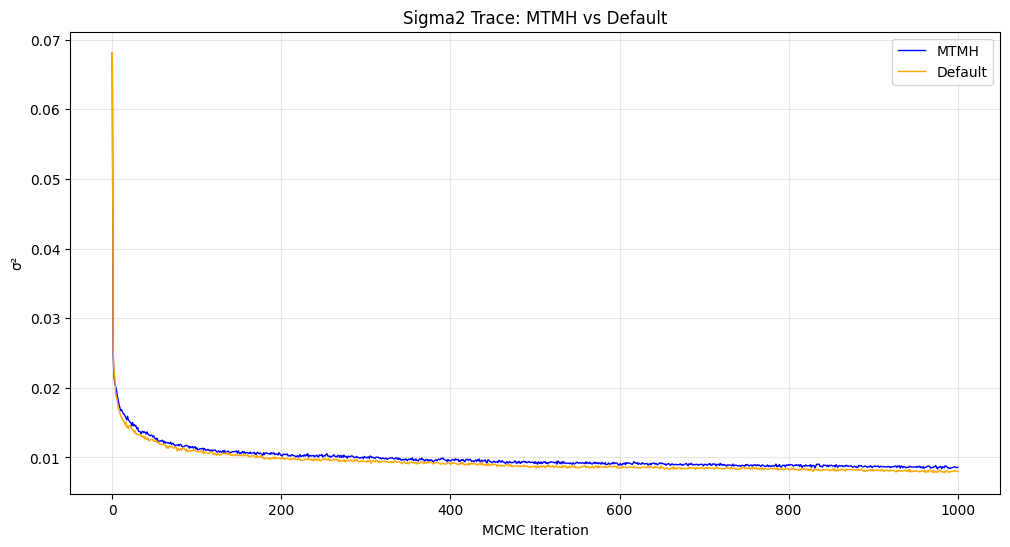

In [5]:
# Plot sigma2 traces for MTMH and Default
plt.figure(figsize=(12, 6))
plt.plot(sigmas_mtmh, color='blue', linewidth=1, label='MTMH')
plt.plot(sigmas_default, color='orange', linewidth=1, label='Default')
plt.xlabel('MCMC Iteration')
plt.ylabel('σ²')
plt.title('Sigma2 Trace: MTMH vs Default')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

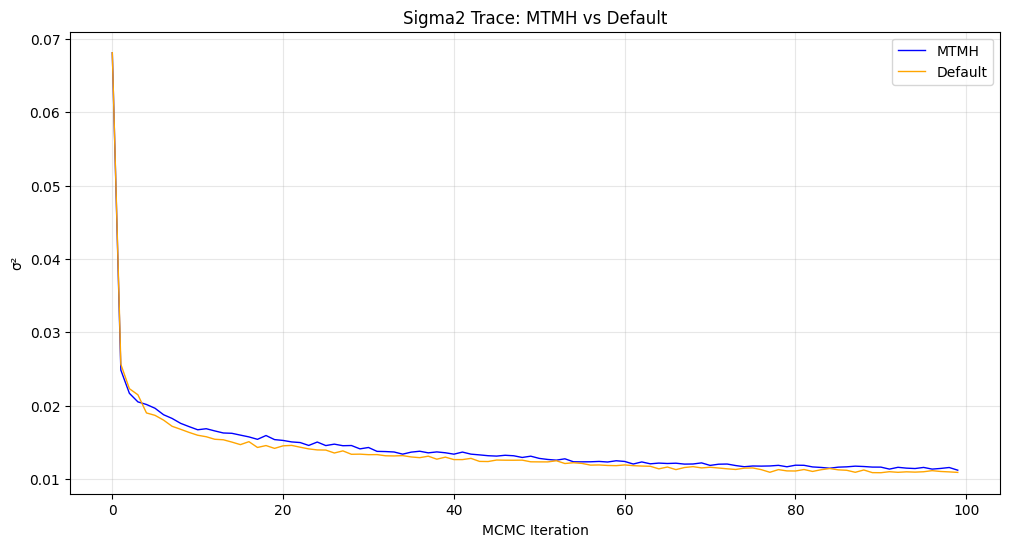

In [6]:
# Plot sigma2 traces for MTMH and Default
plt.figure(figsize=(12, 6))
plt.plot(sigmas_mtmh[:100], color='blue', linewidth=1, label='MTMH')
plt.plot(sigmas_default[:100], color='orange', linewidth=1, label='Default')
plt.xlabel('MCMC Iteration')
plt.ylabel('σ²')
plt.title('Sigma2 Trace: MTMH vs Default')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

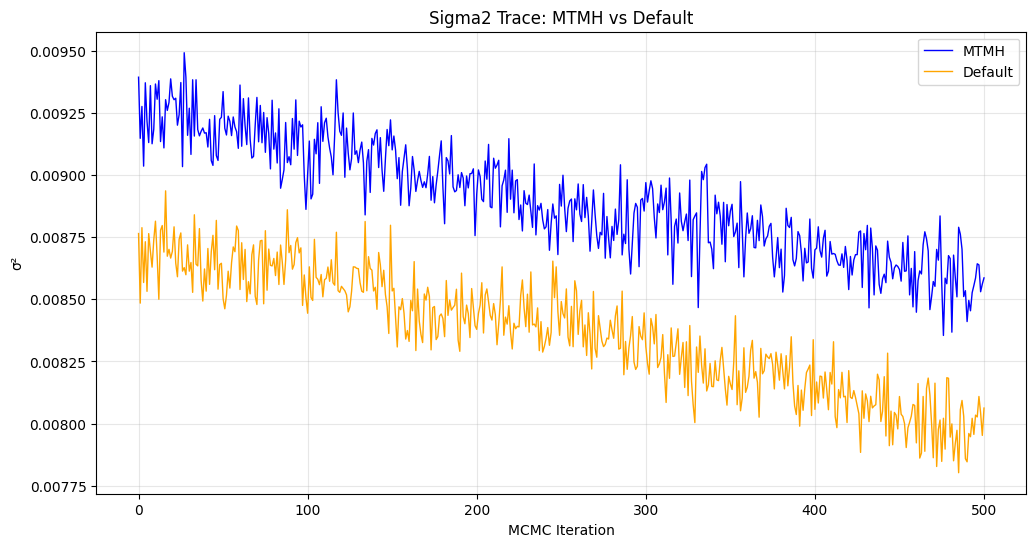

In [7]:
# Plot sigma2 traces for MTMH and Default
plt.figure(figsize=(12, 6))
plt.plot(sigmas_mtmh[500:], color='blue', linewidth=1, label='MTMH')
plt.plot(sigmas_default[500:], color='orange', linewidth=1, label='Default')
plt.xlabel('MCMC Iteration')
plt.ylabel('σ²')
plt.title('Sigma2 Trace: MTMH vs Default')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()